In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
np.warnings = warnings
from sklearn import metrics
from sklearn.cluster import KMeans

In [3]:
df = pd.read_excel('./HATCH_metadata.xlsx', sheet_name = 'metadata')

In [5]:
df = df[df['Cohort']=='A']

In [7]:
df = df[(df['Subject ID']!='A0319')&(df['Subject ID']!='A0370')&(df['Subject ID']!='A0140')&(df['Subject ID']!='A0245')&(df['Subject ID']!='A0269')&(df['Subject ID']!='A0532')&(df['Subject ID']!='A0573')&(df['Subject ID']!='A0804')]

In [9]:
df = df[(df['Subject ID']!='A0774')&(df['Subject ID']!='A0801')&(df['Subject ID']!='A0806')&(df['Subject ID']!='A0825')&(df['Subject ID']!='A0981')&(df['Subject ID']!='A1080')&(df['Subject ID']!='A1261')]

In [11]:
df_cleaned_subset = df[['Subject ID','T_SRS_AWR','T_SRS_COG', 'T_SRS_COMM','T_SRS_MOT','T_SRS_RRB','CBCL_AP_T','CBCL_Externalizing_T','ASC_PA', 'ASC_AA','ASC_SA','ASC_uncertainty','M_SEQ_hypo','M_SEQ_hyper', 'M_SEQ_seeking']]

In [13]:
rows_with_missing_values = df_cleaned_subset[df_cleaned_subset.isnull().any(axis=1)]

In [15]:
missing_value_ratio = df_cleaned_subset.isnull().mean()
print(missing_value_ratio)

Subject ID              0.000000
T_SRS_AWR               0.000000
T_SRS_COG               0.000000
T_SRS_COMM              0.000000
T_SRS_MOT               0.001376
T_SRS_RRB               0.000000
CBCL_AP_T               0.020633
CBCL_Externalizing_T    0.066025
ASC_PA                  0.000000
ASC_AA                  0.000000
ASC_SA                  0.000000
ASC_uncertainty         0.000000
M_SEQ_hypo              0.000000
M_SEQ_hyper             0.000000
M_SEQ_seeking           0.000000
dtype: float64


In [17]:
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df_cleaned_subset.iloc[:,1:])

In [19]:
df_filled = pd.DataFrame(df_filled, columns=df_cleaned_subset.iloc[:,1:].columns)

In [21]:
df_cleaned_subset = df_cleaned_subset.reset_index()

In [23]:
merged_df = pd.concat([df_cleaned_subset['Subject ID'], df_filled ], axis=1)

In [25]:
merged_df

,Subject ID,T_SRS_AWR,T_SRS_COG,T_SRS_COMM,T_SRS_MOT,T_SRS_RRB,CBCL_AP_T,CBCL_Externalizing_T,ASC_PA,ASC_AA,ASC_SA,ASC_uncertainty,M_SEQ_hypo,M_SEQ_hyper,M_SEQ_seeking
0,A0003,64.0,70.0,71.0,73.0,68.0,59.0,59.0,3.0,3.0,8.0,6.0,2.500000,3.071429,2.769231
1,A0015,76.0,76.0,69.0,60.0,64.0,68.0,66.0,5.0,2.0,5.0,6.0,2.333333,2.357143,2.583333
2,A0173,70.0,72.0,74.0,60.0,64.0,82.0,47.0,8.0,2.0,0.0,8.0,1.500000,1.428571,1.076923
3,A0215,71.0,77.0,72.0,71.0,60.0,73.0,74.0,7.0,3.0,4.0,7.0,1.666667,2.142857,2.153846
4,A0235,64.0,68.0,70.0,67.0,62.0,61.0,56.0,2.0,0.0,7.0,1.0,1.166667,1.428571,1.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,A1127,60.0,61.0,61.0,52.0,50.0,53.0,43.0,0.0,0.0,1.0,1.0,1.500000,1.214286,1.230769
723,A1235,64.0,74.0,69.0,77.0,73.0,50.0,58.0,9.0,2.0,10.0,17.0,2.166667,3.714286,1.692308
724,A1239,64.0,63.0,58.0,50.0,50.0,61.0,60.0,5.0,0.0,3.0,0.0,2.333333,1.571429,1.692308
725,A1240,64.0,79.0,79.0,79.0,78.0,66.0,52.0,7.0,3.0,4.0,8.0,1.833333,2.428571,2.461538


In [27]:
merged_df.columns

Index(['Subject ID', 'T_SRS_AWR', 'T_SRS_COG', 'T_SRS_COMM', 'T_SRS_MOT',
       'T_SRS_RRB', 'CBCL_AP_T', 'CBCL_Externalizing_T', 'ASC_PA', 'ASC_AA',
       'ASC_SA', 'ASC_uncertainty', 'M_SEQ_hypo', 'M_SEQ_hyper',
       'M_SEQ_seeking'],
      dtype='object')

In [29]:
merged_df[['T_SRS_AWR', 'T_SRS_COG', 'T_SRS_COMM', 'T_SRS_MOT',
       'T_SRS_RRB', 'CBCL_AP_T', 'CBCL_Externalizing_T', 'ASC_PA', 'ASC_AA',
       'ASC_SA', 'ASC_uncertainty']] = merged_df[['T_SRS_AWR', 'T_SRS_COG', 'T_SRS_COMM', 'T_SRS_MOT',
       'T_SRS_RRB', 'CBCL_AP_T', 'CBCL_Externalizing_T', 'ASC_PA', 'ASC_AA',
       'ASC_SA', 'ASC_uncertainty']].round(decimals=0)

In [31]:
scaler = StandardScaler()
d = scaler.fit_transform(merged_df.iloc[:,1:])

In [33]:
distortions = []
K_range = range(1, 11) 

for i in K_range:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(d)
    distortions.append(kmeans.inertia_)  

C:\Users\win11\.conda\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\win11\.conda\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\win11\.conda\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\win11\.conda\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans 

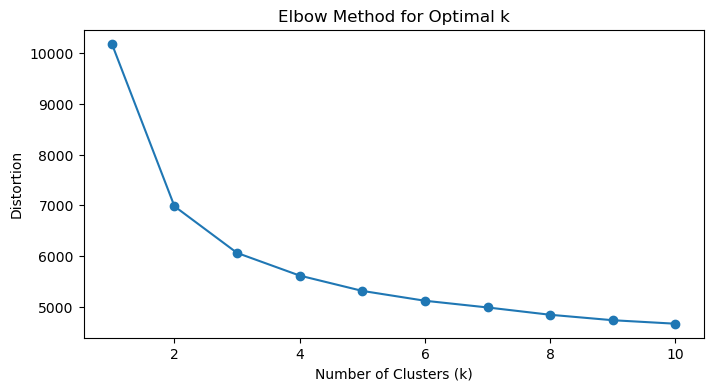

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [37]:
kn = 3 

kmeans = KMeans(n_clusters=kn,random_state=10)

kmeans.fit(d)

C:\Users\win11\.conda\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [39]:
labels = kmeans.labels_

In [41]:
merged_df['Cluster'] = labels

In [43]:
cluster_centers = kmeans.cluster_centers_

In [53]:
cluster_centers

array([[-0.70884133, -0.86748846, -0.91123687, -0.72340773, -0.93973704,
        -0.82640164, -0.74650624, -0.35618252, -0.54124982, -0.45652725,
        -0.62678301, -0.5511835 , -0.66962262, -0.64913221],
       [ 0.88236287,  1.05154323,  1.04866663,  0.99679735,  1.22936963,
         1.07960677,  0.8428308 ,  0.7031158 ,  1.21387106,  0.92162881,
         1.08112939,  0.8260836 ,  1.0727935 ,  0.96832442],
       [ 0.18192287,  0.23665256,  0.2762676 ,  0.1379807 ,  0.21167864,
         0.18689059,  0.23437586, -0.03718791, -0.12851287, -0.0577794 ,
         0.01187681,  0.07215789,  0.05340147,  0.08723818]])

In [55]:
x_values = merged_df.iloc[:,1:-1].columns

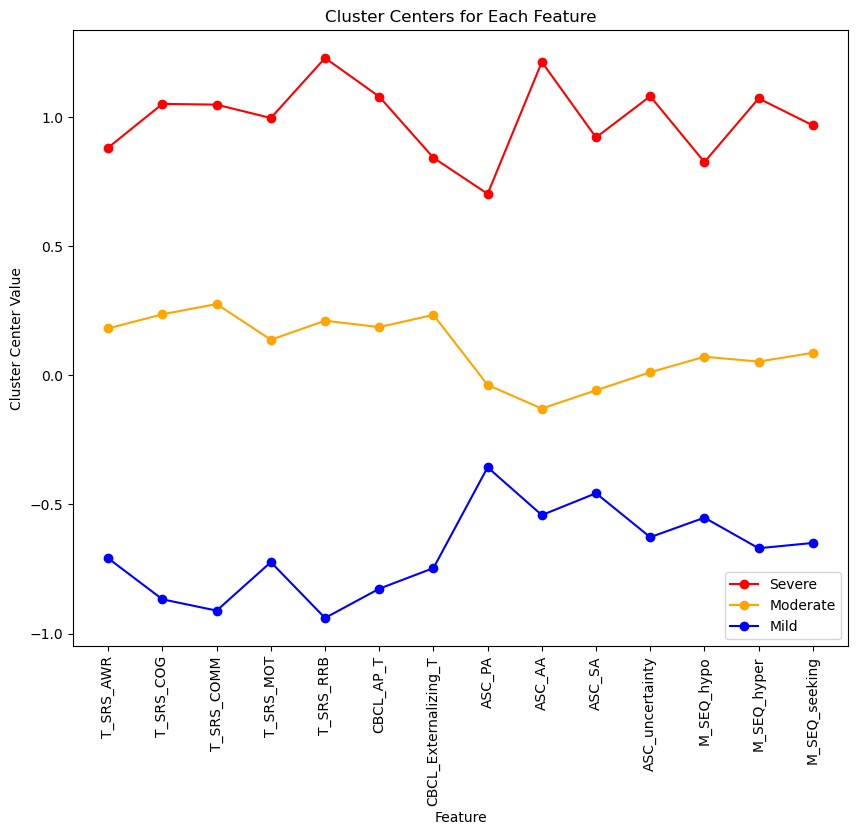

In [57]:
plt.figure(figsize=(10, 8))
    
    # 绘制折线
plt.plot(x_values, cluster_centers[1], label='Severe', marker='o',color='red')
plt.plot(x_values, cluster_centers[2], label='Moderate', marker='o',color='orange')
plt.plot(x_values, cluster_centers[0], label='Mild', marker='o',color='blue')


plt.xlabel('Feature')
plt.ylabel('Cluster Center Value')
plt.title('Cluster Centers for Each Feature')
plt.legend(loc=4)
plt.xticks(rotation=90)
plt.show()